In [515]:
import sys

from math import *;

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

import numpy as np
import geom
import matplotlib.image as image
import matplotlib.pyplot as plt
import importlib
#from matplotlib.mlab import griddata

import scipy.interpolate as snt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import nibabel
import visvis as vv
#os.chdir('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\path_optimization\\')

%matplotlib inline
np.set_printoptions(precision=4, suppress=True)


In [285]:
importlib.reload(geom)

<module 'geom' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy\\geom.py'>

In [351]:
t2wfile=parfil="C:\\Users\\Vandiver\\Data\\sonalleve\\HifuEggAg_20160211\\Caskey_20160211_WIP_T2w_TE40_CLEAR_21_1.PAR"
t2wObj=nibabel.load(t2wfile,scaling='fp')
t2wData=t2wObj.get_data()

t2wvox0=np.arange(0,t2wData.shape[0])
t2wvox1=np.arange(0,t2wData.shape[1])
t2wvox2=np.arange(0,t2wData.shape[2])

t2waffine = t2wObj.get_affine()

vtX, vtY = np.meshgrid(t2wvox0, t2wvox1,indexing='ij')


In [119]:
new_nii_filename = t2wfile[0:-4] + 'bestaff.nii'

#imgObj.get_affine()

scaleddata = t2wData * 30.0 / np.max(t2wData)
new_img = nibabel.Nifti1Image(scaleddata,t2wObj.header.get_best_affine() )
new_img.set_data_dtype(np.float32)
nibabel.save(new_img,new_nii_filename)

In [275]:
t2wObj.get_affine()

array([[ -0.676,   0.   ,   0.   ,  91.898],
       [  0.   ,   0.   ,  -1.3  ,  13.752],
       [  0.   ,  -0.676,   0.   ,  90.443],
       [  0.   ,   0.   ,   0.   ,   1.   ]])

In [786]:
parfil="C:\\Users\\Vandiver\\Data\\sonalleve\\HifuEggAg_20160211\\Caskey_20160211_WIP_Tmap_SingleFocStatic_40W_CLEAR_18_1.PAR"
#parfil="C:\\Users\\Vandiver\\Data\\sonalleve\\HifuEggAg_20160211\\Caskey_20160211_WIP_Temp_MultiTrajA_60W_CLEAR_15_1.PAR"
#parfil="C:\\Users\\Vandiver\\Data\\sonalleve\\HifuEggAg_20160211\\Caskey_20160211_WIP_TemperatureMapping_CLEAR_10_1.PAR"

imgObj=nibabel.load(parfil,scaling='fp')
imgData=imgObj.get_data()

header=imgObj.get_header()
numdyns = header.general_info['max_dynamics']

#Only Mag & Phase (M,P) images saved
complexImgSeries = imgData[:,:,:,0:numdyns]* np.exp(1j * imgData[:,:,:,numdyns:])

TE_ms = 16
B0_T = 3.0
ang2temp = 1.0 / (42.576*0.01*B0_T*TE_ms*1e-3*pi)

tempSeries = np.zeros(complexImgSeries.shape)
for dn in range(0,numdyns):
    tempSeries[:,:,:,dn] = np.angle( complexImgSeries[:,:,:,0] * np.conj(complexImgSeries[:,:,:,dn]) )
    
#orig=tempSeries[72,70,7,:].copy()
#phase correct
for dn in range(1,numdyns):
    mask= (tempSeries[:,:,:,dn] - tempSeries[:,:,:,dn-1]) < (-1.*pi)
    tempSeries[mask,dn] += 2*pi
    
    #mask= (tempSeries[:,:,:,dn] - tempSeries[:,:,:,dn-1]) < (-pi)
    #tempSeries[mask,dn] += pi

#for dn in range(1,numdyns):
#    mask= (tempSeries[:,:,:,dn] - tempSeries[:,:,:,dn-1]) < (-1.8*pi)
#    tempSeries[mask,dn] += 2*pi    

tempSeries*=ang2temp
    
nnM,nnP,nnS,nd=tempSeries.shape
tempSeries.shape

(144, 144, 8, 40)

In [419]:
np.angle( np.exp(pi*1j) )

3.1415926535897931

In [509]:
orig

array([ 0.    ,  0.0138,  0.0215,  0.0368,  0.1105,  0.3406,  0.5785,
        0.7994,  1.0372,  1.4147,  1.5896,  1.8734,  2.1174,  2.3384,
        2.5654,  2.6498,  2.9015,  2.9229, -3.1147, -2.9352, -2.9199,
       -2.8539, -2.7388, -2.6207, -2.7373, -2.5056, -2.8554, -2.9229,
       -2.8478, -2.857 ,  3.0181,  2.659 , -2.056 , -1.944 , -2.053 ,
       -2.2033, -2.3629, -2.4212, -2.5977, -2.6161])

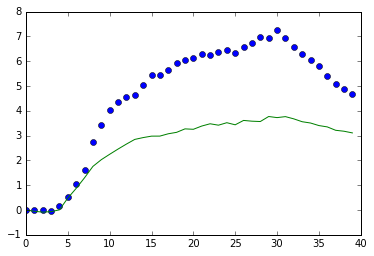

In [791]:
#plt.plot(orig)
plt.plot(tempSeries[73,72,6,:] / ang2temp,'o')
plt.plot(tempSeries[72,70,5,:] / ang2temp)

In [763]:
(tempSeries[73,72,6,9] - tempSeries[73,72,6,8])/  ang2temp

-5.5835197963930758

In [765]:
1.5*pi

4.71238898038469

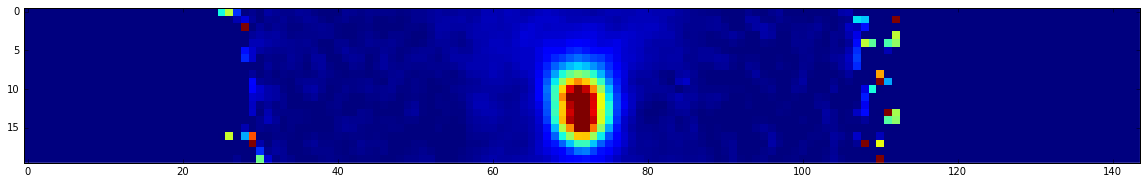

In [789]:
plt.figure(figsize=(20,10))
plt.imshow(tempSeries[60:80,:,6,30], vmin=0 ,vmax=60,interpolation='None' )

In [286]:
imgObj.header.get_affine()

array([[  -1.519 ,    0.    ,    0.    ,  102.0925],
       [   0.    ,    0.    ,   -3.    ,   20.178 ],
       [   0.    ,   -1.519 ,    0.    ,  101.8195],
       [   0.    ,    0.    ,    0.    ,    1.    ]])

In [106]:
imgObj.header.get_best_affine()

array([[  -1.519 ,    0.    ,    0.    ,  108.6085],
       [   0.    ,    1.519 ,    0.    , -108.6085],
       [   0.    ,    0.    ,    3.    ,  -10.5   ],
       [   0.    ,    0.    ,    0.    ,    1.    ]])

In [581]:
def rescaleIm(inArray,newmin=0.0,newmax=1.0,vmin=None,vmax=None,trunc=False):
    """
    Rescale input array values to the range [newmin, newmax]
    Keywords & defaults: newmin=0.0, newmin=1.0
        vmin=  The value in input array that will be mapped to newmin. Default=min(inArray)
        vmax=  The value in input array that will be mapped to newmax. Default=max(inArray)
        trunc=  If true, truncate the output range. Values less than newmin will be set to newmin. Likewise for newmax.
    """
    oldmin = np.min(inArray)
    oldmax = np.max(inArray)
    
    if vmin is None:
        vmin = oldmin
    if vmax is None:
        vmax = oldmax
        
    newim = (inArray - vmin)*(newmax - newmin) / (vmax - vmin) + newmin
    
    if trunc:
        newim[newim < newmin] = newmin
        newim[newim > newmax] = newmax
        
    return newim
    

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
X = np.linspace(0., nnM, nnM)
Y = np.linspace(0., nnP, nnP)
Z = [0.0]

zi=4

Rmat=geom.getRotZYZarray(45,45,0)

mX, mY = np.meshgrid(X, Y)

rX,rY,rZ=geom.rotate_mesh_volume(Rotmat,mX,mY,Z)


scaledIm = rescaleIm(tempSeries[:,:,zi,-1], llt=0.0,ult=30)

coloring = image.cm.hot( scaledIm )
surf = ax.plot_surface(rX, rY, rZ, rstride=1, cstride=1, facecolors=coloring, 
                       linewidth=0, antialiased=False)

ax.elev=80
ax.azi=0
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

In [110]:
new_nii_filename = parfil[0:-4] + 'bestaff_.nii'

#imgObj.get_affine()
new_img = nibabel.Nifti1Image(tempSeries[:,:,:,-1], imgObj.header.get_base_affine() )
new_img.set_data_dtype(np.float32)
nibabel.save(new_img,new_nii_filename)

In [ ]:
griddata()

In [352]:
t2wData.shape

(288, 288, 20)

In [321]:
tempSeries.shape

(144, 144, 15, 60)

In [656]:
dyn=30


vox0 = np.linspace(0., nnM, nnM)
vox1 = np.linspace(0., nnP, nnP)
vmX, vmY = np.meshgrid(vox0, vox1,indexing='ij')

Taffine=imgObj.header.get_affine()

a=vv.gca()
a.light0.ambient=1.0
a.light0.diffuse=1.0
for zi in [4]:
    vox2 = [zi]

    rX,rY,rZ=geom.rotate_mesh_volume(Taffine[:3, :3], vmX, vmY, vox2, translate=Taffine[:3, 3])
    
    Tslice = tempSeries[:,:,zi,dyn]
    
    scaledIm = rescaleIm(Tslice, vmin=0,vmax=30,trunc=True)
    #scaledIm = rescaleIm(imgData[:,:,zi,dyn])
    
    rgbaIm = image.cm.hot(scaledIm)
    

    m = vv.surf(rX,rY,rZ, rgbaIm )
    #m.colormap=vv.CM_HOT
    m.ambient=1.0
    m.diffuse=0.0
    #m.faceShading='flat'

t2slice=9    
tX,tY,tZ=geom.rotate_mesh_volume(t2waffine[:3, :3], vtX, vtY, t2slice, translate=t2waffine[:3, 3])

tsrf = vv.surf(tX,tY,tZ, rescaleIm(t2wData[:,:,t2slice]) )
tsrf.colormap=vv.CM_GRAY
tsrf.ambient=1.0
#tsrf.edgeShading=None
#tsrf.faceShading='flat'


app=vv.use()
app.Run()

C:\Users\Vandiver\Anaconda3\lib\site-packages\visvis\processing\calculateNormals.py:71: RuntimeWarning: invalid value encountered in true_divide
  normals[:,0] /= lengths
C:\Users\Vandiver\Anaconda3\lib\site-packages\visvis\processing\calculateNormals.py:72: RuntimeWarning: invalid value encountered in true_divide
  normals[:,1] /= lengths
C:\Users\Vandiver\Anaconda3\lib\site-packages\visvis\processing\calculateNormals.py:73: RuntimeWarning: invalid value encountered in true_divide
  normals[:,2] /= lengths


In [288]:
scaledIm = rescaleIm(tempSeries[:,:,zi,-1], llt=0.0,ult=30,trunc=True)
m = vv.surf(rX,rY,rZ, scaledIm)
m.colormap=vv.CM_HOT
m.ambient=1.0

vv.use()
app.Run()

In [690]:
t2inds0 = np.arange(100,180)
t2inds1 = np.arange(100,180)
t2inds2 = np.arange(0,t2wData.shape[2])
t2VolSegment = t2wData[np.ix_(t2inds0, t2inds1, t2inds2)]
vt0, vt1,vt2 = np.meshgrid( t2inds0.astype(np.float), t2inds1.astype(np.float), t2inds2.astype(np.float),indexing='ij')

In [691]:
t2rasX,t2rasY,t2rasZ=geom.rotate_mesh_volume(t2waffine[:3, :3], vt0, vt1, vt2, translate=t2waffine[:3, 3])
locationsIn = np.transpose( np.array([t2rasX.flatten(), t2rasY.flatten(), t2rasZ.flatten()]) )

In [687]:
#locationsIn = np.zeros([np.product(t2rasX.shape),3] )
#locationsIn[:,0] = t2rasX.flatten()
#locationsIn[:,1] = t2rasY.flatten()
#locationsIn[:,2] = t2rasZ.flatten()

In [665]:
locationsIn.shape

(32000, 3)

In [703]:
#temperature map segment
vox0 = np.arange(50, 90)
vox1 = np.arange(50, 90)
#vox2 = [8]

#vox0 = np.arange(0, nnM)
#vox1 = np.arange(0, nnP)
vox2 = np.arange(0, nnS)

vm0, vm1, vm2 = np.meshgrid( vox0.astype(np.float), vox1.astype(np.float), vox2.astype(np.float),indexing='ij')

Taffine=imgObj.header.get_affine()
vrX,vrY,vrZ=geom.rotate_mesh_volume(Taffine[:3, :3], vm0, vm1, vm2, translate=Taffine[:3, 3])

dyn=30
Tsegment = np.squeeze( tempSeries[np.ix_(vox0,vox1,vox2,[dyn])] )


In [818]:
dyn=28
Tsegment = np.squeeze( tempSeries[np.ix_(vox0,vox1,vox2,[dyn])] )

In [ ]:
temppoints = np.transpose( np.array([vrX.flatten(), vrY.flatten(), vrZ.flatten()]) )

In [700]:
vrX.shape

(40, 40, 8)

In [701]:
interpT2onTemp = snt.griddata(locationsIn, t2VolSegment.flatten(), (vrX,vrY,vrZ), fill_value=np.min(t2VolSegment[:,:,9]), method='linear' )

In [ ]:
interpTempOnT2 = snt.griddata(temppoints, Tsegment.flatten(), (t2rasX,t2rasY,t2rasZ), fill_value=0), method='linear' )

In [664]:
np.transpose( np.array([vrX.flatten(), vrY.flatten(), vrZ.flatten()]) ).shape

(20736, 3)

In [550]:
np.max(interpT)

15953278.984858744

In [574]:
np.min(t2VolSegment)

memmap(0.0)

In [551]:
interpT.shape

(144, 144)

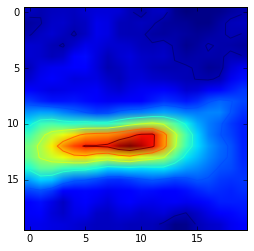

In [624]:
plt.imshow( np.squeeze( tempSeries[np.ix_(vox0,vox1,vox2,[6])] )  )
plt.contour(np.squeeze( tempSeries[np.ix_(vox0,vox1,vox2,[6])] ))

In [576]:
np.min(t2VolSegment[:,:,9])

memmap(6355838.957797748)

In [704]:
Tsegment.shape

(40, 40, 8)

In [710]:
np.arange(0,60.001,10)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.])

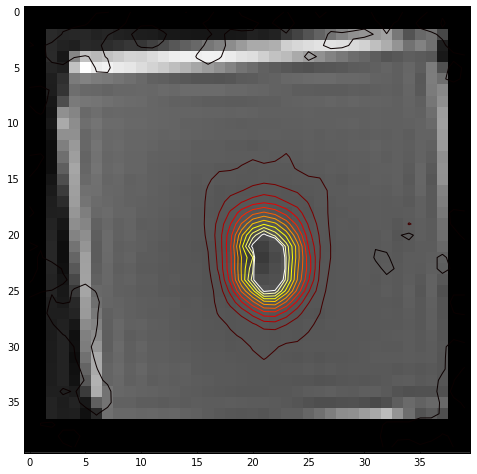

In [820]:
zi=6
plt.figure(figsize=(8,8))
plt.imshow( interpT2onTemp[:,:,zi], cmap=image.cm.gray, interpolation='none' )
plt.contour(Tsegment[:,:,zi], np.arange(0,60.001,5), cmap=image.cm.hot)
#plt.imshow(np.squeeze( tempSeries[np.ix_(vox0,vox1,vox2,[6])] ), vmin=0,vmax=30, cmap=image.cm.hot,interpolation='none')
#plt.colorbar()

In [698]:
t2scmin=np.min(t2VolSegment[:,:,9])
t2scmax=np.max(t2VolSegment)

tsrf = vv.surf(t2rasX[:,:,9],t2rasY[:,:,9],t2rasZ[:,:,9], rescaleIm(t2VolSegment[:,:,9],vmin=t2scmin,vmax=t2scmax) )
tsrf.colormap=vv.CM_GRAY


tsrf = vv.surf(t2rasX[:,:,1],t2rasY[:,:,1],t2rasZ[:,:,1], rescaleIm(t2VolSegment[:,:,1],vmin=t2scmin,vmax=t2scmax) )
tsrf.colormap=vv.CM_GRAY

tsrf = vv.surf(vrX[:,:,6],vrY[:,:,6],vrZ[:,:,6], rescaleIm(interpT2onTemp[:,:,6],vmin=t2scmin,vmax=t2scmax) )
tsrf.colormap=vv.CM_GRAY
#tsrf.edgeColor

app=vv.use()
app.Run()

In [554]:
scaledIm = rescaleIm(tempSeries[:,:,zi,dyn],newmin=0,newmax=1, llt=0.0,ult=30,trunc=True)
rgbaIm = image.cm.hot(scaledIm)
m = vv.surf(rX,rY,rZ, rgbaIm)


In [385]:
image.cm.hot(scaledIm).shape

(144, 144, 4)

In [58]:
newImObj=nibabel.load(new_nii_filename)

In [61]:
newImData=newImObj.get_data()

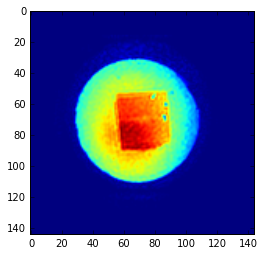

In [62]:
plt.imshow(imgData[:,:,4,24])

In [1]:
import sqlite3 as sql

In [2]:
db = "C:\\Users\\Vandiver\\Data\\simulations\\AblationSims.db"

In [3]:
con = sql.connect(db)

In [4]:
con

In [7]:
cur = con.cursor()

In [8]:
cur

In [ ]:
cur.execute("insert into grid")

In [9]:
meta = cur.execute("PRAGMA table_info('grid')")

In [10]:
meta

In [11]:
for r in meta:
    print(r)

(0, 'gridid', 'INTEGER', 0, None, 1)
(1, 'Nx', 'INTEGER', 0, None, 0)
(2, 'Ny', 'INTEGER', 0, None, 0)
(3, 'Nz', 'INTEGER', 0, None, 0)
(4, 'xw', 'REAL', 0, None, 0)
(5, 'yw', 'REAL', 0, None, 0)
(6, 'zw', 'REAL', 0, None, 0)
(7, 'xc', 'REAL', 0, '0.0', 0)
(8, 'yc', 'REAL', 0, '0.0', 0)
(9, 'z0', 'REAL', 0, '11.0', 0)
